# DATASET AUGMENTATION

In [1]:
import os
import cv2
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import import_ipynb
import DatasetPreparation
import Modeling
from tensorflow.keras.layers import Input, Normalization, Conv2D, MaxPooling2D, Dense, Flatten, BatchNormalization, Dropout
from tensorflow.keras.metrics import BinaryAccuracy, FalsePositives, FalseNegatives, TrueNegatives, TruePositives, Precision, Recall, F1Score, AUC
from tensorflow.keras.regularizers import L2
import sklearn

Found 6799 files belonging to 3 classes.
Using 5440 files for training.
Found 6799 files belonging to 3 classes.
Using 1359 files for validation.
Found 2278 files belonging to 3 classes.


2025-01-28 12:42:04.095427: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M3 Pro
2025-01-28 12:42:04.095453: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 18.00 GB
2025-01-28 12:42:04.095460: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 6.00 GB
2025-01-28 12:42:04.095473: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2025-01-28 12:42:04.095483: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential (Sequential)         │ (None, 256, 256, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 254, 254, 6)    │           168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 254, 254, 6)    │            24 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 253, 253, 6)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 253, 253, 6)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 251, 251, 6)    │           330 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 251, 251, 6)    │            24 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 250, 250, 6)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 375000)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 100)            │    37,500,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 100)            │           400 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,010 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 10)             │            40 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 3)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 37,502,129 (143.06 MB)

 Trainable params: 37,501,885 (143.06 MB)

 Non-trainable params: 244 (976.00 B)

In [2]:
trainDataset, testDataset, valDataset = DatasetPreparation.trainDataset, DatasetPreparation.testDataset, DatasetPreparation.valDataset
model = Modeling.model

## Augmentation

In [3]:
# Augmentation Method Using Keras Sequential Layer
augmentLayers = tf.keras.Sequential([
    tf.keras.layers.RandomRotation(
        factor=(0.025, 0.025),
    ),
    tf.keras.layers.RandomFlip(
        mode = 'HORIZONTAL',
    ),
    tf.keras.layers.RandomContrast(
        factor=0.1,
    ),
])

def augment(image, label):
    return augmentLayers(image, training=True), label

In [4]:
trainDataset = trainDataset.map(augment, num_parallel_calls=tf.data.AUTOTUNE)

## Training

In [5]:
lossFunction = tf.keras.losses.CategoricalCrossentropy() # If Labels as One-Hot-Encodings

In [6]:
METRICS = [tf.keras.metrics.CategoricalAccuracy(name="accuracy"), tf.keras.metrics.TopKCategoricalAccuracy(k=2, name="top_k_accuracy")]

In [7]:
CONFIGURATION = Modeling.CONFIGURATION
CONFIGURATION

{'CLASS_NAMES': ['angry', 'happy', 'sad'],
 'BATCH_SIZE': 32,
 'IMAGE_SIZE': 256,
 'LEARNING_RATE': 0.001,
 'N_EPOCHS': 20,
 'DROPOUT_RATE': 0.0,
 'REGULARIZATION_RATE': 0.0,
 'N_FILTERS': 6,
 'KERNEL_SIZE': 3,
 'N_STRIDES': 1,
 'POOL_SIZE': 2,
 'N_DENSE_1': 100,
 'N_DENSE_2': 10,
 'NUM_CLASSES': 3}

In [8]:
model.compile(
    optimizer = tf.keras.optimizers.Adam(learning_rate=CONFIGURATION["LEARNING_RATE"]),
    loss = lossFunction,
    metrics=METRICS
)

In [9]:
history = model.fit(
    trainDataset,
    validation_data = valDataset,
    epochs = CONFIGURATION['N_EPOCHS'],
    verbose=1
)

Epoch 1/20


2025-01-28 12:42:04.581915: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


170/170 ━━━━━━━━━━━━━━━━━━━━ 23s 123ms/step - accuracy: 0.4375 - loss: 1.2967 - top_k_accuracy: 0.7371 - val_accuracy: 0.4636 - val_loss: 1.0402 - val_top_k_accuracy: 0.7815
Epoch 2/20
170/170 ━━━━━━━━━━━━━━━━━━━━ 21s 122ms/step - accuracy: 0.5716 - loss: 0.9262 - top_k_accuracy: 0.8434 - val_accuracy: 0.4879 - val_loss: 1.0090 - val_top_k_accuracy: 0.7940
Epoch 3/20
170/170 ━━━━━━━━━━━━━━━━━━━━ 21s 123ms/step - accuracy: 0.6575 - loss: 0.8128 - top_k_accuracy: 0.8765 - val_accuracy: 0.5188 - val_loss: 0.9830 - val_top_k_accuracy: 0.8028
Epoch 4/20
170/170 ━━━━━━━━━━━━━━━━━━━━ 21s 121ms/step - accuracy: 0.7252 - loss: 0.6950 - top_k_accuracy: 0.9011 - val_accuracy: 0.5563 - val_loss: 0.9466 - val_top_k_accuracy: 0.8308
Epoch 5/20
170/170 ━━━━━━━━━━━━━━━━━━━━ 20s 119ms/step - accuracy: 0.7762 - loss: 0.5840 - top_k_accuracy: 0.9362 - val_accuracy: 0.5408 - val_loss: 1.0481 - val_top_k_accuracy: 0.8021
Epoch 6/20
170/170 ━━━━━━━━━━━━━━━━━━━━ 21s 123ms/step - accuracy: 0.8383 - loss: 0.48

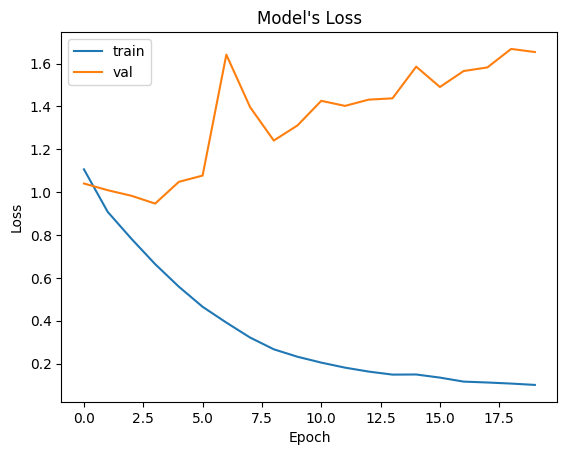

In [10]:
# PLotting the model's loss graph for both training and validation
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Model's Loss")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend(["train", "val"])
plt.show()

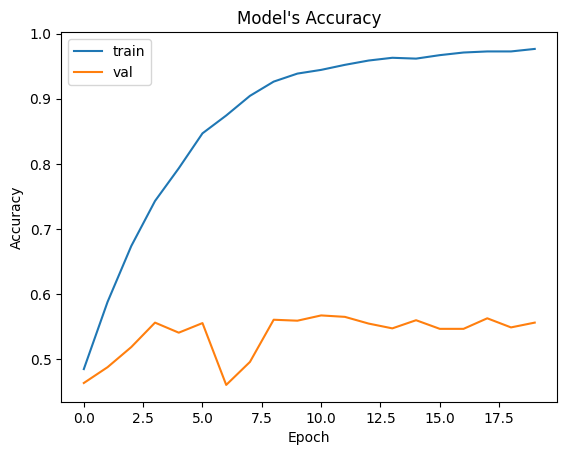

In [11]:
# PLotting the model's accuracy graph for both training and validation
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Model's Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["train", "val"])
plt.show()

In [12]:
model.evaluate(testDataset)

72/72 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.5804 - loss: 1.6202 - top_k_accuracy: 0.8378


[1.6822664737701416, 0.5697980523109436, 0.8323090672492981]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 463ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


2025-01-28 12:49:09.292891: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


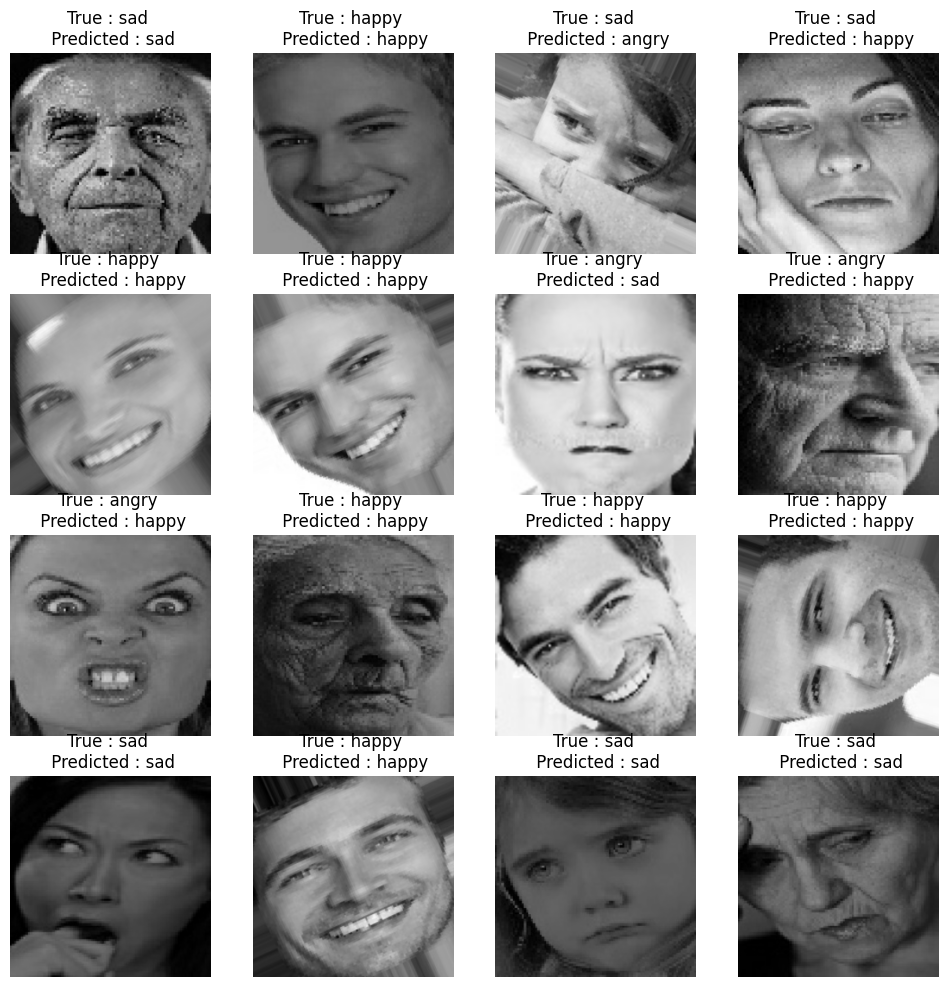

In [13]:
# Testing 1 Batch
plt.figure(figsize=(12, 12))

for images, labels in testDataset.take(1):
    for i in range(16):
        ax = plt.subplot(4, 4, i+1)
        plt.imshow(images[i]/255.0)
        prediction = model.predict(tf.expand_dims(images[i], axis=0))
        true = CONFIGURATION["CLASS_NAMES"][tf.argmax(labels[i], axis=0).numpy()]
        predicted = CONFIGURATION["CLASS_NAMES"][tf.argmax(prediction, axis=-1).numpy()[0]]
        plt.title("True : {} \n Predicted : {}".format(true, predicted))
        plt.axis("off")

In [14]:
labels = []
predicted = []
for image, label in valDataset:
    predicted.append(model.predict(image, verbose=0))
    labels.append(label.numpy())

2025-01-28 12:49:11.556592: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [15]:
pred = np.argmax(predicted[:-1], axis=-1).flatten()
true = np.argmax(labels[:-1], axis=-1).flatten()
print(pred, true)

[2 2 2 ... 1 1 2] [0 1 2 ... 1 0 0]


[[ 79 118  98]
 [ 30 430 142]
 [ 52 155 240]]


Text(0.5, 36.72222222222221, 'Predicted')

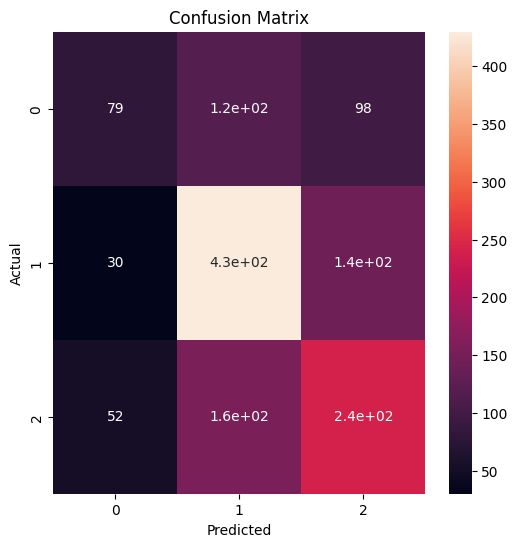

In [16]:
cm = sklearn.metrics.confusion_matrix(true, pred)
print(cm)
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')